<a href="https://colab.research.google.com/github/ericiortega/aipi590-xai-fall2025/blob/main/assignments/interpretable_ml/interpretable_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interpretable ML Assignment
**Course:** AIPI 590 – Emerging Trends in Explainable AI (Fall 2025)  
**Professor:** Dr. Brinnae Bent  
**Author:** Eric Ortega Rodriguez  
**Dataset:** [Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)  
**Deadline:** September 15, 2025  

---


### Importing Libraries

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Load dataset directly from your GitHub repo
churn_data = "https://raw.githubusercontent.com/ericiortega/aipi590-xai-fall2025/main/data/telco_customer_churn.csv"
df = pd.read_csv(churn_data)

# Cleaning data
# Changing TotalCharges to numeric, coerce errors to NaN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Drop rows with missing TotalCharges
df = df.dropna(subset=["TotalCharges"]).reset_index(drop=True)

# Map churn Yes/No to 1/0
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0}).astype(int)

print(df.shape)
df.head()

(7032, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


### Exploratory Data Analysis (EDA)

To begin, I will perform exploratory data analysis (EDA) to better understand the dataset and check assumptions required for linear regression, logistic regression, and generalized additive models (GAMs). I will be doing the following:


1. Summarize the churn distribution and make sure that our dataset is balanced.
2. Explore the categorical and numerical features.  
3. Look at correlations and relationships with churn.  
4. Find potential nonlinear patterns that may be better captured by a GAM.

Missing values per column (non-zero):


,0


/tmp/ipython-input-498322988.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette="Set2")


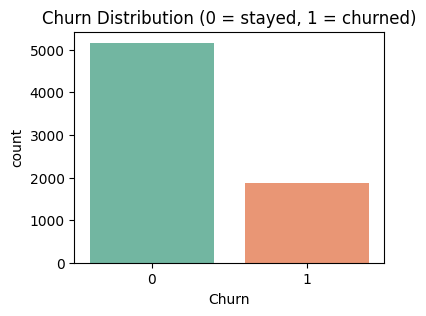

Churn rate: 26.58%


In [8]:
# check missing values
print("Missing values per column (non-zero):")
missing = df.isna().sum()
display(missing[missing > 0].sort_values(ascending=False))

# churn distribution
plt.figure(figsize=(4,3))
sns.countplot(x="Churn", data=df, palette="Set2")
plt.title("Churn Distribution (0 = stayed, 1 = churned)")
plt.show()

# churn percentage
churn_rate = df["Churn"].mean()
print(f"Churn rate: {churn_rate:.2%}")
